<IPython.core.display.Javascript object>


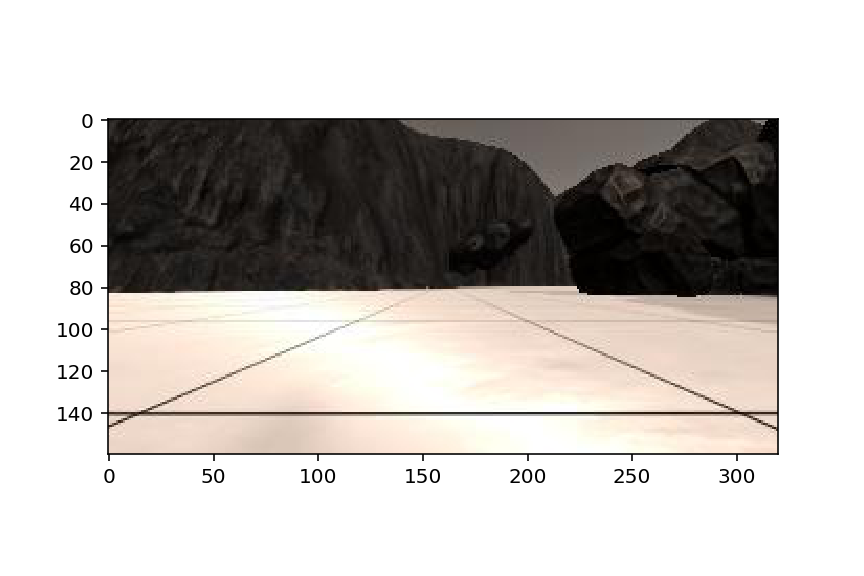

In [17]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
# Uncomment the next line for use in a Jupyter notebook
# This enables the interactive matplotlib window
%matplotlib notebook
image = mpimg.imread('example_grid1.jpg')
plt.imshow(image)


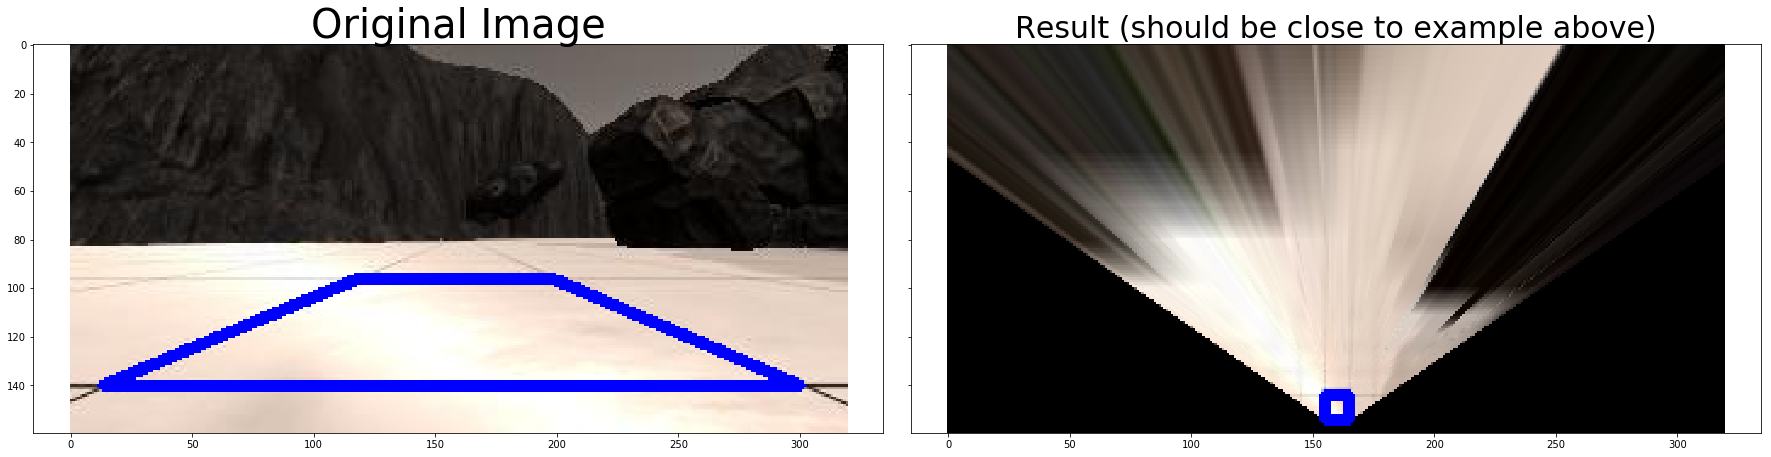

In [24]:
import numpy as np
import cv2
%matplotlib inline
def perspect_transform(img, src, dst):

    # Get transform matrix using cv2.getPerspectivTransform()
    M = cv2.getPerspectiveTransform(src, dst)
    # Warp image using cv2.warpPerspective()
    # keep same size as input image
    warped = cv2.warpPerspective(img, M, (img.shape[1], img.shape[0]))
    # Return the result
    return warped

# Define source and destination points
source = np.float32([[13.69, 140.67], [118.2, 96.16], [198.2, 96.16], [ 300.14, 140.67]])
# destination = np.float32([[ , ], [ , ], [ , ], [ , ]])


dst_size= 5
bottom_offset = 6
destination = np.float32([[image.shape[1]/2 - dst_size, image.shape[0] - bottom_offset],
                          [image.shape[1]/2 - dst_size, image.shape[0] - 2*dst_size - bottom_offset],
                  
                  [image.shape[1]/2 + dst_size, image.shape[0] - 2*dst_size - bottom_offset], 
                  [image.shape[1]/2 + dst_size, image.shape[0] - bottom_offset],
                  ])
# destination = np.float32([[118.2, 140.67], 
#                  [118.2, 96.16], 
#                  [198.2, 96.16], 
#                  [198.2, 140.67]])

warped = perspect_transform(image, source, destination)
# plt.imshow(warped)

# Draw Source and destination points on images (in blue) before plotting
cv2.polylines(image, np.int32([source]), True, (0, 0, 255), 3)
cv2.polylines(warped, np.int32([destination]), True, (0, 0, 255), 3)
# Display the original image and binary               
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 6), sharey=True)
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=40)

ax2.imshow(warped, cmap='gray')
ax2.set_title('Result (should be close to example above)', fontsize=30)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)